Завдання 1

​

У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

In [461]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [462]:
df_data_2d = pd.read_csv('data/data_2d.csv')
df_mnist = pd.read_csv('data/mnist.csv')

In [463]:
X_data_2d = df_data_2d.iloc[: , 1:]

In [464]:
sse_data = []
k_range_data = range(1, 21)
for k in k_range_data:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_data_2d)
    sse_data.append(kmeans.inertia_)

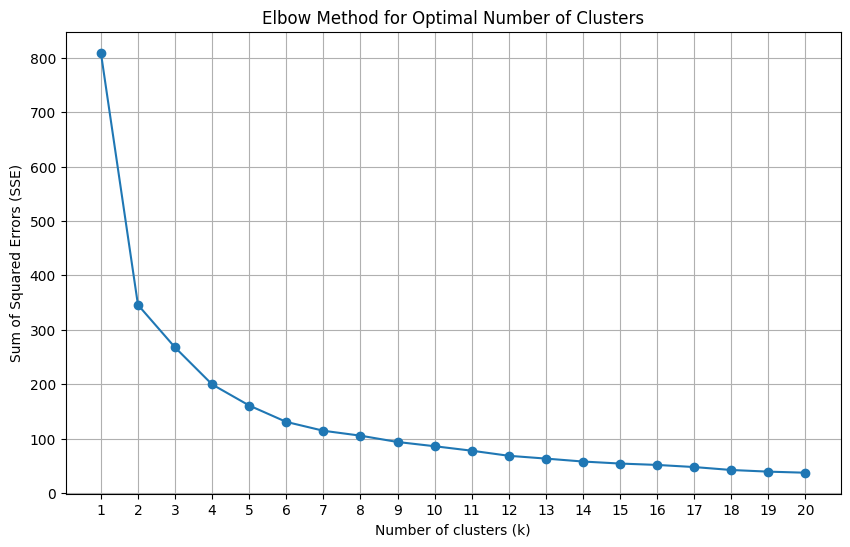

In [465]:
plt.figure(figsize=(10, 6))
plt.plot(k_range_data, sse_data, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range_data)
plt.grid(True)
plt.show()

In [466]:
sse_mnist = []
k_range_mnist = range(1, 21)
for k in k_range_mnist:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_mnist)
    sse_mnist.append(kmeans.inertia_)

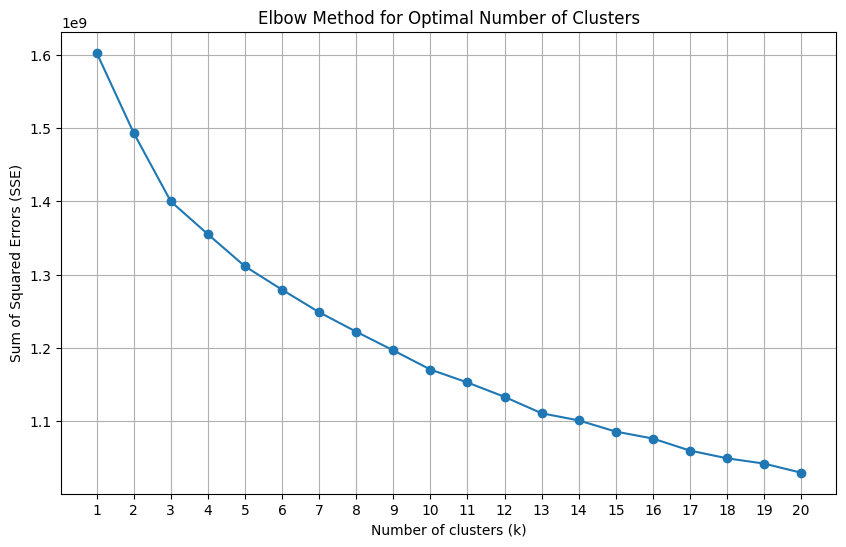

In [467]:
plt.figure(figsize=(10, 6))
plt.plot(k_range_mnist, sse_mnist, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range_mnist)
plt.grid(True)
plt.show()

In [468]:
pca = PCA(n_components=2)
pca_mnist = pca.fit_transform(df_mnist)

In [469]:
sse_mnist_with_pca = []
k_range_mnist_with_pca = range(1, 21)
for k in k_range_mnist:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_mnist)
    sse_mnist_with_pca.append(kmeans.inertia_)

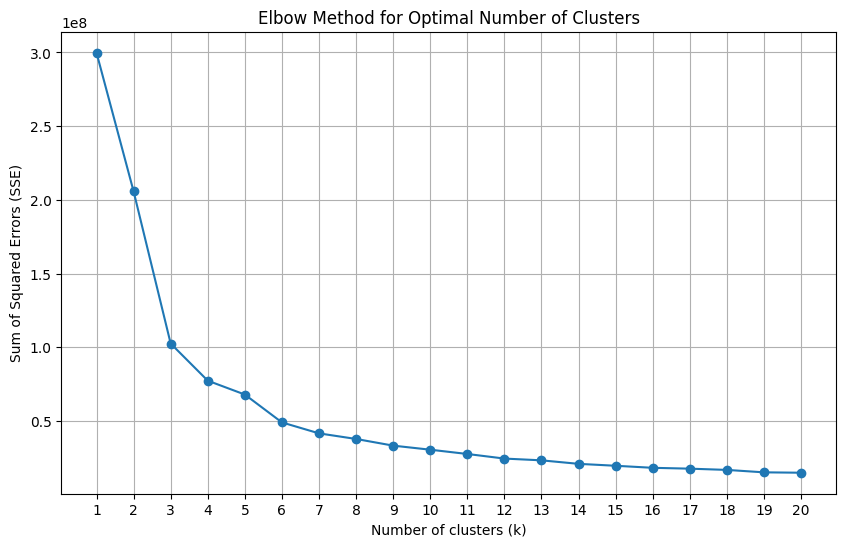

In [470]:
plt.figure(figsize=(10, 6))
plt.plot(k_range_mnist_with_pca, sse_mnist_with_pca, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range_mnist_with_pca)
plt.grid(True)
plt.show()

Завдання 2

​

Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [471]:
kmeans_data_2d = KMeans(n_clusters=7, random_state=42)
kmeans_data_2d.fit_transform(X_data_2d)
cluster_data2d = kmeans_data_2d.labels_

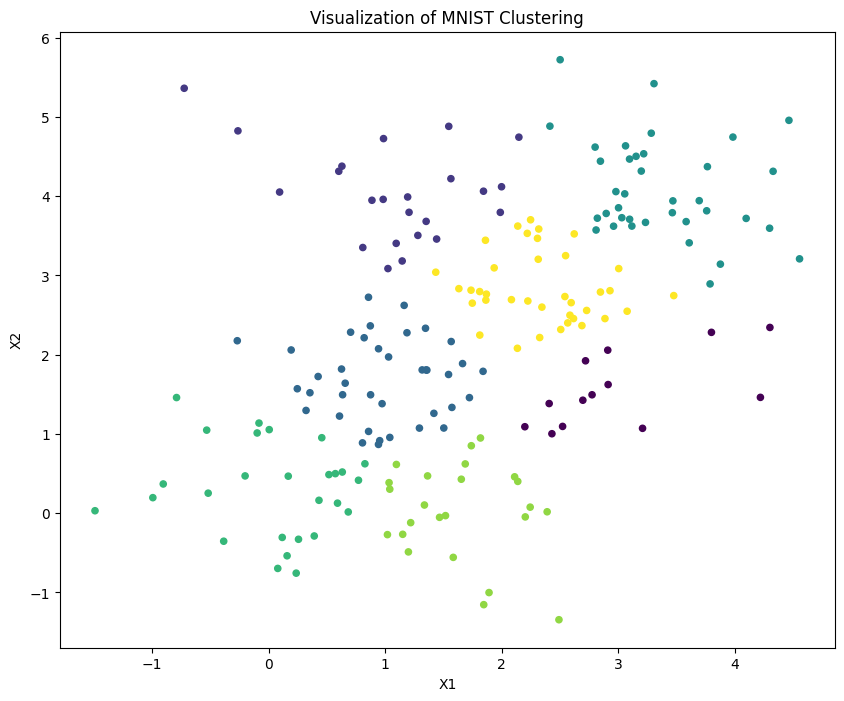

In [472]:
plt.figure(figsize=(10, 8))
plt.scatter(X_data_2d.iloc[:, 0], X_data_2d.iloc[:, 1], c=cluster_data2d, s=20)
plt.title('Visualization of MNIST Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [473]:
pca = PCA(n_components=2)
pca_mnist = pca.fit_transform(df_mnist)
kmeans_mnist = KMeans(n_clusters=6, random_state=42)
kmeans_mnist.fit_transform(pca_mnist)
clusters_mnist = kmeans_mnist.labels_


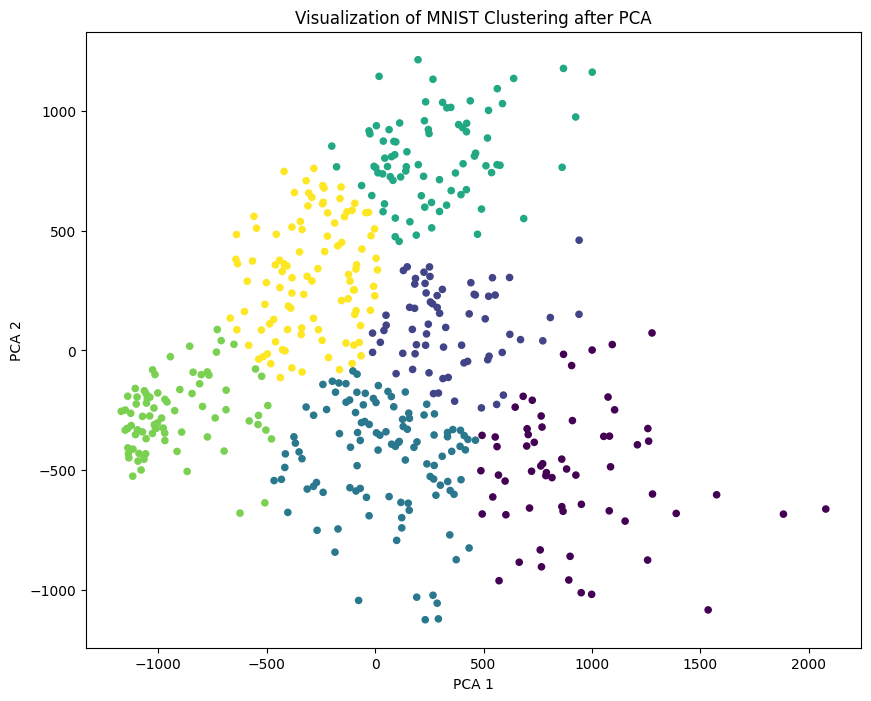

In [474]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_mnist[:, 0], pca_mnist[:, 1], c=clusters_mnist, s=20)
plt.title('Visualization of MNIST Clustering after PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()